In [1]:
# Name: example_basic
# Authors: Stephan Meighen-Berger, Kruteesh Desai
# An analysis script for Christian on P-ONE new effective areas

In [2]:
# imports
from constants import pdm_constants as const
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
from scipy.stats import *
from pone_aeff import Aeff
import pickle
import math
import pandas as pd
import csv
from matplotlib.lines import Line2D
from matplotlib import rc
def find_nearest(array: np.array, value: float):
    
    """ Returns: index of the nearest vlaue of an array to the given number
    --------------
    idx :  float
    """
    array = np.array(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [3]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot
lw=0.1  # Linewidth
h_length=0.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'
color_4='#1b9e77'
color_6='#d95f02'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
mass_grid = config["simulation parameters"]["mass grid"]
sv_grid = config["simulation parameters"]["sv grid"]
# Grids
m_4_id = find_nearest(mass_grid, 1e4)
m_6_id = find_nearest(mass_grid, 1e6)
m_3_id = find_nearest(mass_grid, 1e3)
m_5_id = find_nearest(mass_grid, 1e5)
sv_56 = find_nearest(sv_grid, 5.6e-23)



In [5]:
hits = [2]
modules = [3]
spacing = [50, 80, 110, 140, 200]
pos_res = [2]

In [32]:
pdm_res = {}
pdm_signal = {}
for i,sp in enumerate(spacing):
    config['general']['detector'] = 'POne'
    config['general']['pone type'] = 'new'
    config['pone']['smearing'] = 'smeared'
    config['general']['density'] = 'NFW'
    config['general']["channel"] = "All"
    config['pone_christian']['hit'] = hits[0]
    config['pone_christian']['module'] = modules[0]
    config['pone_christian']['spacing'] = sp
    config['pone_christian']['pos res'] = pos_res[0]
    pdm_t = PDM()
    pdm_res[hits[0], modules[0], sp, pos_res[0]] = pdm_t.results
    pdm_signal[hits[0], modules[0], sp, pos_res[0]] = pdm_t.signal

e_grid = pdm_t._shower_sim.egrid
e_width = pdm_t._shower_sim.ewidth

Christians Effective Areas are being used
pone background
Christians Background calculation started
dict_keys(['numu', 'nue', 'nutau'])
Calculation finished


100%|██████████| 3/3 [00:00<00:00, 30.84it/s]


Christians Effective Areas are being used
pone background
Christians Background calculation started
dict_keys(['numu', 'nue', 'nutau'])
Calculation finished


100%|██████████| 3/3 [00:00<00:00, 41.73it/s]


Christians Effective Areas are being used
pone background
Christians Background calculation started
dict_keys(['numu', 'nue', 'nutau'])
Calculation finished


100%|██████████| 3/3 [00:00<00:00, 43.97it/s]


Christians Effective Areas are being used
pone background
Christians Background calculation started
dict_keys(['numu', 'nue', 'nutau'])
Calculation finished


100%|██████████| 3/3 [00:00<00:00, 48.75it/s]


Christians Effective Areas are being used
pone background
Christians Background calculation started
dict_keys(['numu', 'nue', 'nutau'])
Calculation finished


100%|██████████| 3/3 [00:00<00:00, 44.68it/s]


In [33]:
# Loading comparison data
th_cl = np.loadtxt(open("../data/thermal_relic.csv"), delimiter = ",")
unitarity = np.loadtxt(open('../data/Unitarity_bound.csv'), delimiter = ',')
cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])
unitarity = (unitarity[unitarity[:, 0].argsort()])

#limits_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/limits_results_IceCube.pkl','rb'))
limits_pone_unsm = pickle.load(open("../data/28_03_02/unsmeared/limits_results_POne_unsm.pkl","rb"))
#limits_com = pickle.load(open("/home/kruteesh/Desktop/dm_data_server/14_03/data/limits_results.pkl", "rb"))
#limits_pone_unsm = pickle.load(open("../data/28_03_02/unsmeared/limits_results_POne_unsm.pkl","rb"))

limits_pone_45_25= pickle.load(open("../data/14_04/smeared/45_25/limits_results_POne_sm.pkl","rb"))

limits_pone_35_15= pickle.load(open("../data/14_04/smeared/35_15/limits_results_POne_sm.pkl","rb"))

limits_pone_25_10= pickle.load(open("../data/14_04/smeared/25_10/limits_results_POne_sm.pkl","rb"))

limits_pone_15_009= pickle.load(open("../data/14_04/smeared/15_009/limits_results_POne_sm.pkl","rb"))


cl_lit_ice = np.loadtxt('../data/IceCube_HE.csv', delimiter=",")
cl_lit_ice = (cl_lit_ice[cl_lit_ice[:, 0].argsort()])
xx,yy = np.meshgrid(np.log10( np.logspace(1, 6, 20)),np.log10( np.logspace(1, 6, 20)))

In [34]:
#pickle.dump(pdm_res, open('../data/tmp_files/unsmeared_limits.pkl','wb'))
limits_unsm_christ = pickle.load(open('../data/tmp_files/unsmeared_limits.pkl', 'rb'))
#limits_sm_christ = pickle.load(open('../data/tmp_files/smeared_limits.pkl', 'rb'))
smearing_mat = pickle.load(open("../data/tmp_files/Christian_/smearing_mat_christ.pkl", "rb"))

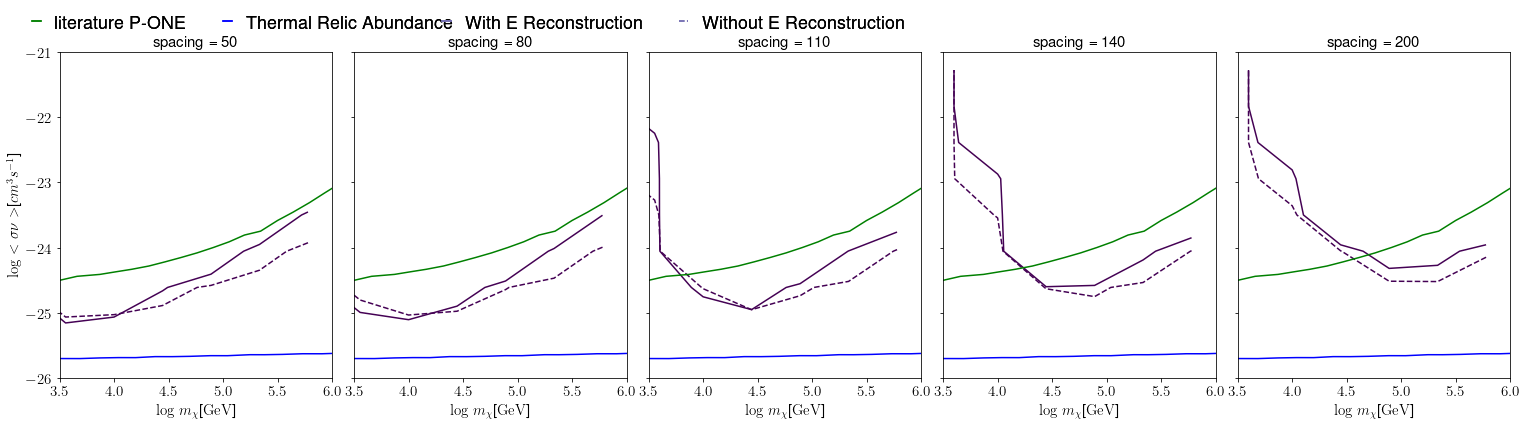

In [35]:
color = ['black', 'orange', 'purple']
color_sm = ['red', 'black', 'purple']
color_pa = ['']
color_pa = ['']
color_pa = ['']
color_pa = ['']

ll = ['-','--', '-.', 'dotted']
 # std_size, std_size * 6. / 8.),
figure = plt.figure(figsize=(std_size+20,std_size))
gs = figure.add_gridspec(1, 5, hspace=0.06, wspace=0.08)
ax = gs.subplots( sharex=True, sharey=True)
# figure, ax = plt.subplots(1, 5, figsize=(std_size+20,std_size), sharex=True, wspace=0.05)
j=0
particle = 'numu'
for i in pdm_res.keys():
    
    # Limits
    # ---------------------------------------------
    # Setup
    # print(i, type(i))_bool_smea
     
    # ---------------------------------------------
    # Plotting
    ax[j].set_title('spacing =  %i' % (i[2]),fontsize=fontsize)  # +' Scaling Correction = '+str(config['advanced']['scaling correction'])

    ax[j].contour(pdm_res[i]["nue"], levels = [0.9],  linestyles='-',
               origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                       min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    # ax[j].contour(limits_sm_christ[i][particle], levels = [0.9],  linestyles='--',
    #            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    # min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    ax[j].contour(limits_unsm_christ[i][particle], levels = [0.9],  linestyles='--',
               origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                       min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    ax[j].plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label=r'literature P-ONE')
    #ax[j].plot(np.log10(cl_lit_ice[:, 0]), np.log10(cl_lit_ice[:, 1]),'m',label='literature  IceCube')
    ax[j].plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
             label=r'Thermal Relic Abundance')
    #ax[j].plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.k', 
    #         label=r'Unitarity Bound')
    # ---------------------------------------------
    # Axis options
    ax[j].set_xscale("linear")
    ax[j].set_yscale("linear")
    ax[j].set_xlabel(r"$\log$ $m_{\chi}$[\textrm{GeV}]", fontsize=fontsize)
    
    ax[j].tick_params(axis = 'both', which = 'major', labelsize=fontsize)
    ax[j].tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
    ax[j].set_xlim(3.5, max(np.log10(mass_grid)))
    ax[j].set_ylim(min(np.log10(sv_grid)), -21)  # 
    #ax[j].text(3.5, -23.7, "IceCube Simulation", fontsize=fontsize)
    #ax[j].text(3.2, -24.8, r"P-ONE $\nu_\mu$", fontsize=fontsize)
    #ax[j].text(3.2, -24.9, r" $\nu_e$", fontsize=fontsize)
    #ax[j].text(3.1, -25.3, r" $\nu_\tau$", fontsize=fontsize)
    # ---------------------------------------------
    # Legend
    # plt.legend(fontsize=fontsize)
    j=j+1
ax[0].set_ylabel(r"$\log$ $<\sigma \nu>$[$cm^{3} s^{-1}$]", fontsize=fontsize)
h, l = ax[0].get_legend_handles_labels()
lgd1 = ax[0].legend(h, l, loc=7, bbox_to_anchor=(1.5, +1.09),
                 ncol=2, fontsize=fontsize+3, handlelength=h_length,
                 fancybox=True, frameon=False)
ax[0].add_artist(lgd1)
legend_elements = [Line2D([0], [0], color=color_pone, lw=1.7),
                   Line2D([0], [0], linestyle='--', color=color_pone,  lw=1.5),
                   # Line2D([0], [0], linestyle='-.', color=color_sm[j],  lw=1.3),
#               Line2D([0], [0], linestyle=':',  color=color_sm[j], lw=1),
#               #Line2D([0], [0], color=color_sm[j], linestyle='dotted', lw=2),
           ]
labels = [r'With E Reconstruction',
        r'Without E Reconstruction',
        #r'0.25, 0.10',
        #r'0.15, 0.09'
        ]
# plt.legend(legend_elements, labels)
#h,_ = ax[j].get_legend_handles_labels([legend_elements])
lgd2= ax[2].legend(legend_elements, labels, loc=7, bbox_to_anchor=(1, 1.09),
             ncol=2, fontsize=fontsize+3, handlelength=h_length,
             fancybox=True, frameon=False)
ax[2].add_artist(lgd2)
# --------------------------------------------
# Storing the image
    
figure.savefig(PICS + "Limits_christ.png",
           bbox_inches='tight', dpi=export_dpi, facecolor="white")



In [36]:
back_50 = pickle.load(open('../data/tmp_files/Christian_/Back_christ_sm_50.pkl', 'rb'))
back_80 = pickle.load(open('../data/tmp_files/Christian_/Back_christ_sm_80.pkl', 'rb'))
back_110 = pickle.load(open('../data/tmp_files/Christian_/Back_christ_sm_110.pkl', 'rb'))
back_140 = pickle.load(open('../data/tmp_files/Christian_/Back_christ_sm_140.pkl', 'rb'))
back_200 = pickle.load(open('../data/tmp_files/Christian_/Back_christ_sm_200.pkl', 'rb'))
back_t = [back_50, back_80, back_110, back_140, back_200]

# back_ang = pickle.load(open('../data/Back_christ_ang.pkl', 'rb')) 
signal_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/limits_signal_IceCube.pkl','rb'))
signal_com_un = pickle.load(open("../data/14_04/unsmeared/signal_grid_combined_un.pkl","rb"))
signal_pone_un = pickle.load(open("../data/14_04/unsmeared/signal_grid_POne_un.pkl","rb"))
signal_pone_sm = pickle.load(open('../data/limits_signal_POne.pkl', 'rb'))

#back_po = pickle.load(open('../data/background_pone_sm.pkl','rb'))
background_ic = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/background_ice.pkl','rb'))
back_ice_ob = pickle.load(open('../data/tmp_files/background_ice_data_total.pkl','rb'))
#back_comb =  pickle.load(open('../data/background_combined.pkl','rb'))
background_pone_unsm = pickle.load(open('../data/background_pone_unsm.pkl','rb'))
background_pone_sm_45_25 = pickle.load(open('../data/tmp_files/background_pone.pkl', 'rb'))
# background_pone_sm_35_15 = pickle.load(open('../data/14_04/smeared/35_15/background_pone.pkl', 'rb'))
# background_pone_sm_25_10 = pickle.load(open('../data/14_04/smeared/25_10/background_pone.pkl', 'rb'))
# background_pone_sm_15_009 = pickle.load(open('../data/14_04/smeared/15_009/background_pone.pkl', 'rb'))

In [37]:
back_t[3][particle].shape,  pdm_signal[i][particle][sv_56][3]

((121,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]))

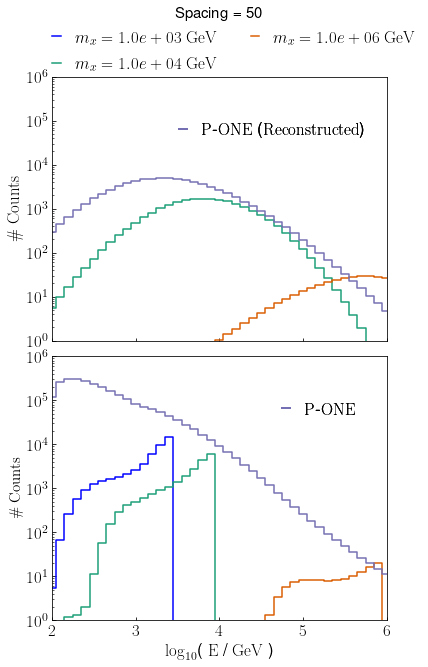

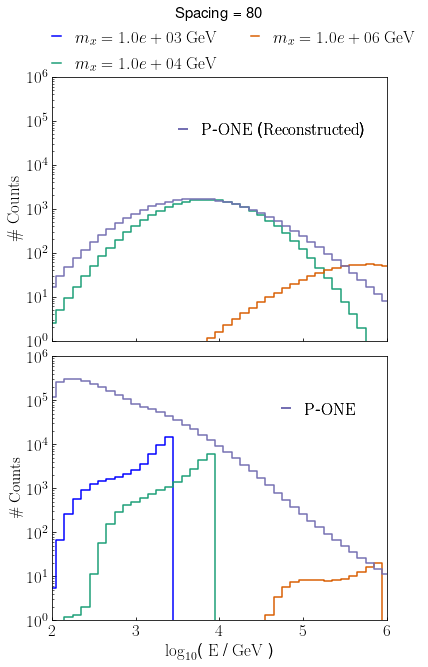

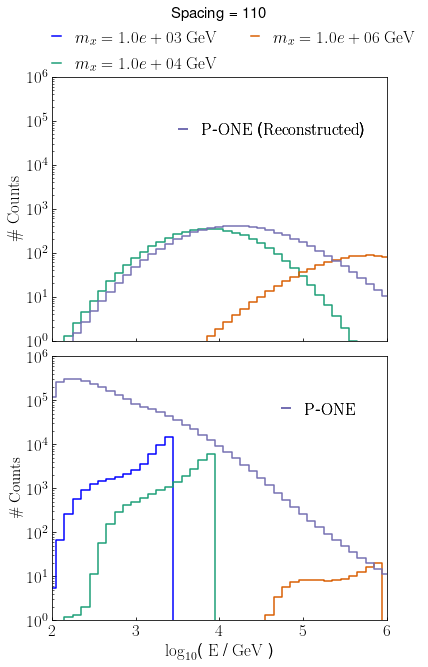

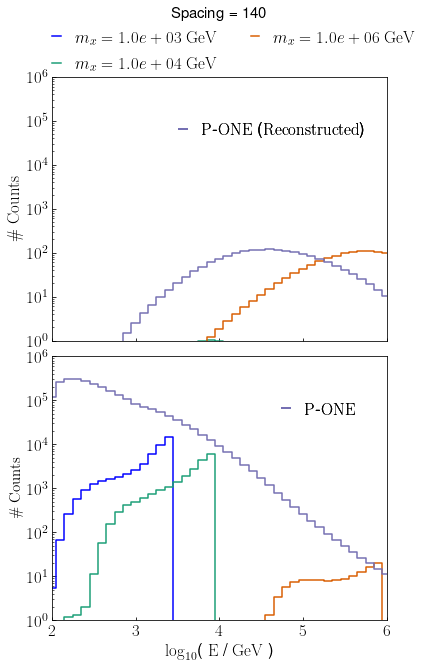

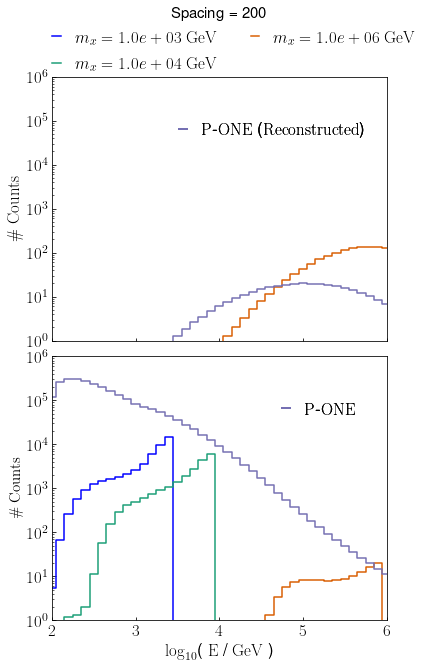

In [38]:
j=0
particle = "nue"
for i in pdm_res.keys():
    
    fig = plt.figure(figsize=(std_size,std_size+4))
    gs = fig.add_gridspec(2, 1, hspace=0.06, wspace=0.05)
    (ax1), (ax2) = gs.subplots( sharex=True, sharey=True)
    ax1.set_title("Spacing = %i" % (i[2]), y=1.2, fontsize=fontsize)

    ax1.step(np.log10(e_grid[-len(pdm_signal[i]['numu'][sv_56][m_3_id]):]), pdm_signal[i][particle][sv_56][m_3_id], color='b', linestyle='-',
             label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_3_id]))
    ax1.step(np.log10(e_grid[-len(pdm_signal[i]['numu'][sv_56][0]):]), pdm_signal[i][particle][sv_56][m_4_id], color=color_4, linestyle='-',
             label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))
    ax1.step(np.log10(e_grid[-len(pdm_signal[i]['numu'][sv_56][0]):]), pdm_signal[i][particle][sv_56][m_6_id] * 10, color=color_6, linestyle='-',
             label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_6_id]))



    ax2.step(np.log10(e_grid[-len(signal_pone_sm['numu'][6][0]):]), signal_pone_un['numu'][6][3], color='b', linestyle='-')#,
             #label=r'$m_{x}=%.1e$ $GeV$' % (mass_grid[2]))
    ax2.step(np.log10(e_grid[-len(signal_pone_sm['numu'][6][0]):]), signal_pone_un["numu"][6][4], color=color_4, linestyle='-')#,
             #label=r'$m_{x}=%.1e$ $GeV$' % (mass_grid[4]))
    ax2.step(np.log10(e_grid[-len(signal_pone_sm['numu'][6][0]):]), signal_pone_un["numu"][6][-1], color=color_6, linestyle='-')#,
             #label=r'$m_{x}=%.1e$ $GeV$' % (mass_grid[-1]))

    ax1.step(np.log10(e_grid), back_t[j]['numu'], '-', color=color_pone)

    ax2.step(np.log10(e_grid), background_pone_unsm['numu'], '-', color=color_pone)

    ax1.set_yscale("log")
    #ax1.set_xlabel(r'$\log_{10}$( E / $GeV$ )', fontsize=fontsize+6)
    ax1.set_ylabel(r'$ \#$  $\textrm{Counts}$', fontsize=fontsize+2)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize+2, direction='in')
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize+2, direction='in')
    #ax1.set_xlim(2, 6)
    #ax1.set_ylim(1e0,1e6)
    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.13, +1.1),
                     ncol=2, fontsize=fontsize+2, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)

    #ax2.set_xscale("log")
    ax2.set_yscale("log")
    #ax2.set_xlabel(r'$\log_{10}$( E / $GeV$ )', fontsize=fontsize+6)
    ax2.set_ylabel(r'$\#$  $\textrm{Counts}$', fontsize=fontsize)
    ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize+2, direction='in')
    ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize+2, direction='in')
    ax2.set_xlim(2, 6)
    ax2.set_ylim(1e0,1e6)

    ax2.set_xlabel(r'$\log_{10}$( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize+2)
    h = [Line2D([0], [0], color=color_pone,lw=2)]
    l = [r'$\textrm{P}$-$\textrm{ONE}$'
              ]
    lgd1 = ax2.legend(h, l, loc=7, bbox_to_anchor=(0.95, +0.8),
                     ncol=2, fontsize=fontsize+2, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax2.add_artist(lgd1)
    h_i = [Line2D([0], [0], color=color_pone ,lw=2)]
    l_i = [r'$\textrm{P}$-$\textrm{ONE}$ ($\textrm{Reconstructed}$)'
              ]
    lgd2 = ax1.legend(h_i, l_i, loc=7, bbox_to_anchor=(0.98, +0.8),
                     ncol=2, fontsize=fontsize+2, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd2)

    plt.show()
    fig.savefig(PICS + "chris_signal_%i" %(i[2]) +".png",
                   bbox_inches='tight', dpi=export_dpi, facecolor='white')
    j+=1

In [39]:
atm = Atm_Shower()

TypeError: list indices must be integers or slices, not str

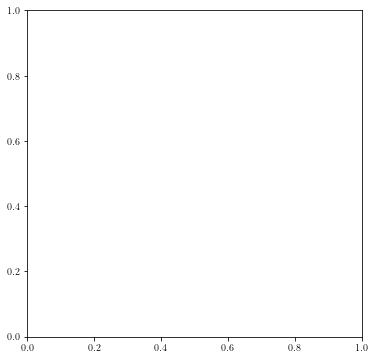

In [40]:
figure, ax1 = plt.subplots(1,1,figsize=(std_size,std_size), sharex=True) 


ax1.step(np.log10(atm._egrid), 2*back_t['numu'], color='b', label=r'P-ONE' )

ax1.set_yscale("log")

ax1.set_xlabel(r'$\log_{10}$ ( $E$ / $ \textrm{GeV} )$ ', fontsize=fontsize)

ax1.set_ylabel(r'\# $Counts$', fontsize=fontsize)

ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')



ax1.set_xlim(3, 6)

ax1.set_ylim(1,1e6)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.85, +1.03),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)

# ---------------------------------------------
# Showing the image
plt.show()
#figure.savefig(PICS + "Final_eff_area"+".png",
 #              bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [ ]:
# for i,a in enumerate(config['pone_christian']['angles']):
#     figure, ax1 = plt.subplots(1,1,figsize=(std_size,std_size), sharex=True) 
#     ax1.set_title('Zenith angle = %f' % (a))
# 
#     ax1.step(np.log10(atm._egrid), 2*back_ang['numu'][i], color='b', label=r'P-ONE' )
#     
#     ax1.set_yscale("log")
#     
#     ax1.set_xlabel(r'$\log_{10}$ ( $E$ / $ \textrm{GeV} )$ ', fontsize=fontsize)
#     
#     ax1.set_ylabel(r'\# Counts', fontsize=fontsize)
#     
#     ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
#     ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
#     
#     
#     
#     
#     ax1.set_xlim(3, 6)
#     #ax1.set_ylim(1,1e10)
#     h, l = ax1.get_legend_handles_labels()
#     lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.85, +1.09),
#                      ncol=2, fontsize=fontsize, handlelength=h_length,
#                      fancybox=True, frameon=False)
#     ax1.add_artist(lgd1)
#     
#     # ---------------------------------------------
#     # Showing the image
#     plt.show()
#     #figure.savefig(PICS + "Final_eff_area"+".png",
#      #              bbox_inches='tight', dpi=export_dpi, facecolor='white')
#     break

Sample of file system 

In [ ]:
a_eff_file = pickle.load(open("../data/aeff_cluster_nuecc.pkl",'rb'))
smearing_file = pickle.load(open("../data/fisher_casc.pkl",'rb'))

In [ ]:
a_eff_file

(array([-1.        , -0.94871795, -0.8974359 , -0.84615385, -0.79487179,
        -0.74358974, -0.69230769, -0.64102564, -0.58974359, -0.53846154,
        -0.48717949, -0.43589744, -0.38461538, -0.33333333, -0.28205128,
        -0.23076923, -0.17948718, -0.12820513, -0.07692308, -0.02564103,
         0.02564103,  0.07692308,  0.12820513,  0.17948718,  0.23076923,
         0.28205128,  0.33333333,  0.38461538,  0.43589744,  0.48717949,
         0.53846154,  0.58974359,  0.64102564,  0.69230769,  0.74358974,
         0.79487179,  0.84615385,  0.8974359 ,  0.94871795,  1.        ]),
 array([3.   , 3.075, 3.15 , 3.225, 3.3  , 3.375, 3.45 , 3.525, 3.6  ,
        3.675, 3.75 , 3.825, 3.9  , 3.975, 4.05 , 4.125, 4.2  , 4.275,
        4.35 , 4.425, 4.5  , 4.575, 4.65 , 4.725, 4.8  , 4.875, 4.95 ,
        5.025, 5.1  , 5.175, 5.25 , 5.325, 5.4  , 5.475, 5.55 , 5.625,
        5.7  , 5.775, 5.85 , 5.925, 6.   ]),
                                                                                     

In [ ]:
cos_zen_edges, log10E_edges, aeff_hist = a_eff_file

In [ ]:
np.abs(np.rad2deg(np.arccos(cos_zen_edges)) - 90)

array([90.        , 71.5713304 , 63.82304783, 57.7957725 , 52.64314803,
       48.03811117, 43.81306146, 39.86834155, 36.13881466, 32.57897039,
       29.15536543, 25.84241287, 22.61986495, 19.47122063, 16.38266985,
       13.3423638 , 10.33989089,  7.36588583,  4.41172579,  1.46928358,
        1.46928358,  4.41172579,  7.36588583, 10.33989089, 13.3423638 ,
       16.38266985, 19.47122063, 22.61986495, 25.84241287, 29.15536543,
       32.57897039, 36.13881466, 39.86834155, 43.81306146, 48.03811117,
       52.64314803, 57.7957725 , 63.82304783, 71.5713304 , 90.        ])

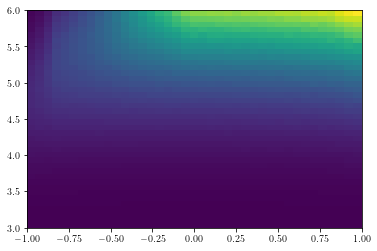

In [ ]:
aeff = aeff_hist.loc[2, 3, 2, 50]["aeff_hist"]

plt.pcolormesh(cos_zen_edges, log10E_edges, aeff.T)

In [ ]:
m_log10E = []
for i,e in enumerate(log10E_edges):
    if i == 0:
        m_log10E.append(log10E_edges[i])
    elif i == 40:
        break
    else:
        m_log10E.append((log10E_edges[i] + log10E_edges[i-1]) / 2)
    

In [ ]:
aeff_hist.index.get_level_values(0)

Int64Index([1, 2, 3, 4, 5, 1, 2, 3, 4, 5,
            ...
            3, 3, 4, 4, 4, 4, 5, 5, 5, 5],
           dtype='int64', name='hit_threshold', length=650)

In [ ]:
aeff_hist.loc[2, 3, 2, 50]["aeff_hist"][0]

array([0.00258981, 0.0043048 , 0.00640574, 0.00867867, 0.01167652,
       0.01482403, 0.01914624, 0.02489475, 0.03237454, 0.04168637,
       0.05054213, 0.06244896, 0.07522961, 0.08822598, 0.09916716,
       0.11809459, 0.13285491, 0.15159003, 0.17028923, 0.18258832,
       0.20028518, 0.2070801 , 0.22063785, 0.22358722, 0.22442803,
       0.23188081, 0.21989756, 0.21525723, 0.20225734, 0.19141609,
       0.17997619, 0.15161754, 0.13967976, 0.11795263, 0.0979764 ,
       0.08106666, 0.06426679, 0.05041277, 0.03844062, 0.02699519])

In [ ]:
aeff.shape, cos_zen_edges.shape, log10E_edges.shape

((39, 40), (40,), (41,))

In [ ]:
smearing_file.index.get_level_values(1)

Float64Index([ 50.0,  50.0,  50.0,  50.0,  50.0,  50.0,  50.0,  50.0,  50.0,
               50.0,
              ...
              200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0,
              200.0],
             dtype='float64', name='spacing', length=648)

In [ ]:
x = 'abc' 

In [ ]:
smearing_file

x         y  \
                        spacing energy        pmts                        
Full optimistic triang  50.0    1000.000000   16     1.352739  0.703857   
                                              20     1.012067  0.637069   
                                              24     0.942791  0.535503   
                                3162.277660   16     0.707869  0.342387   
                                              20     0.493276  0.321912   
...                                                       ...       ...   
Full pessimistic triang 200.0   100000.000000 20    12.182048  7.256502   
                                              24    11.086242  6.215335   
                                316227.766017 16     7.194615  4.748942   
                                              20     6.147630  3.551338   
                                              24     5.169241  2.979987   

                                                           z    stheta  \
                        spacing energy        pmts                       
Full optimistic triang  50.0    1000.000000   16    0.559729  0.049481   
                                              20    0.464704  0.040069   
                                              24    0.385330  0.037156   
                                3162.277660   16    0.275615  0.026889   
                                              20    0.216154  0.021130   
...                                                      ...       ...   
Full pessimistic triang 200.0   100000.000000 20    1.974188  0.117641   
                                              24    1.694111  0.107730   
                                316227.766017 16    1.060124  0.072736   
                                              20    0.951684  0.064724   
                                              24    0.832194  0.058203   

                                                        sphi         t  \
                        spacing energy        pmts                       
Full optimistic triang  50.0    1000.000000   16    0.154299  1.723374   
                                              20    0.133711  1.445467   
                                              24    0.123173  1.187608   
                                3162.277660   16    0.085099  0.866455   
                                              20    0.069441  0.762709   
...                                                      ...       ...   
Full pessimistic triang 200.0   100000.000000 20    0.723334  8.965950   
                                              24    0.640616  7.900044   
                                316227.766017 16    0.430284  5.026051   
                                              20    0.407114  4.415720   
                                              24    0.393804  3.921338   

                                                        logE  ang_res_sampl  \
                        spacing energy        pmts                            
Full optimistic triang  50.0    1000.000000   16    0.060975       3.955554   
                                              20    0.053944       3.322063   
                                              24    0.048278       2.993003   
                                3162.277660   16    0.033501       2.098690   
                                              20    0.029657       1.788490   
...                                                      ...            ...   
Full pessimistic triang 200.0   100000.000000 20    0.106407      10.203195   
                                              24    0.094693       9.312985   
                                316227.766017 16    0.063664       6.413332   
                                              20    0.057363       5.368697   
                                              24    0.051617       4.804440   

                                                    theta_deg    phi_deg  \
                        spacing energy        pmts    

In [ ]:
"Full pessimistic triang"

'Full pessimistic triang'

In [ ]:
e_bin = np.logspace(2, 6, 21, base=10)
cos_bin = np.linspace(-1,1,20)
energies = smearing_file.loc[("Full pessimistic cluster", 50, slice(None), 16), "logE"].index.get_level_values(2)
log10Esigmas = smearing_file.loc[("Full pessimistic cluster", 50, slice(None), 16), "logE"].values
sp = UnivariateSpline(energies, log10Esigmas )

In [ ]:
smearing_file.loc[("Full pessimistic cluster", 50, energies[2], 16), "logE"]

0.026728937

In [ ]:
energies.shape, log10Esigmas.shape

((6,), (6,))

In [ ]:
log10Esigmas

array([0.09079123, 0.0496104 , 0.02672894, 0.01449095, 0.00777092,
       0.0042394 ], dtype=float32)

In [ ]:
smearing_file.loc[("Full pessimistic cluster", 50, slice(None), 16), "logE"].index.get_level_values(2)

Float64Index([            1000.0, 3162.2776601683795,            10000.0,
              31622.776601683792,           100000.0,  316227.7660168379],
             dtype='float64', name='energy')

In [ ]:
e_bin

array([1.00000000e+02, 1.58489319e+02, 2.51188643e+02, 3.98107171e+02,
       6.30957344e+02, 1.00000000e+03, 1.58489319e+03, 2.51188643e+03,
       3.98107171e+03, 6.30957344e+03, 1.00000000e+04, 1.58489319e+04,
       2.51188643e+04, 3.98107171e+04, 6.30957344e+04, 1.00000000e+05,
       1.58489319e+05, 2.51188643e+05, 3.98107171e+05, 6.30957344e+05,
       1.00000000e+06])

In [ ]:
def local_log_normal(x, mu, s):
    """Distribution function 
    x = log10(E_grid)
    mu = log10(E) 
    sigma = ( standard deviation as per definition ) ( so no percentage or fraction )
    """
    s = ( s  )
    pdf = np.exp(-( np.log10(x) - mu )**2 / (2 * s**2)) / (x * s * np.sqrt(2 * np.pi))

    return pdf

In [ ]:
def local_normal(x, mu, s):
    """Gaussian distribution function
    x = E grid
    mu = mean E, log10E
    s = sigma, log10E(standard deviation )
    """
    x = np.log10(x)
    pdf = np.exp(-(((x - mu) / s)**2) / 2) / (s * np.sqrt(2 * np.pi))
    return pdf

In [ ]:
e_grid = atm.egrid

In [ ]:
def find_nearest(array: np.array, value: float):

    """ Returns: index of the nearest vlaue of an array to the given number
    --------------
    idx :  float
    """
    array = np.array(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [ ]:
find_nearest(e_grid, energies[0])

40

In [ ]:
spl_sigma = UnivariateSpline(energies, log10Esigmas, k=1, s=0, ext=3)
sigmas = spl_sigma(e_grid)

In [ ]:
print('energies_low = %.1e, _high = %.1e' % (e_grid[40], e_grid[67]))

energies_low = 8.9e+02, _high = 4.5e+05


In [ ]:
#for j,s in enumerate(sigmas): 
#    if s < 0.01:
#       sigmas[j] = 0.01

In [ ]:
t_p = 40
e_grid_c = e_grid[t_p:]
e_bin_c = np.log10(e_grid_c)
sigmas_c = sigmas[t_p:]

In [ ]:
grid_recon = []
for i,e in enumerate(e_grid_c):
    tmp_e_recon = local_normal(e_grid_c, np.log10(e), sigmas_c)
    norm = (np.sum(np.nan_to_num(tmp_e_recon)))
    grid_recon.append(np.nan_to_num(tmp_e_recon)) 


In [ ]:
grid_recon

[array([4.39406171e+000, 2.38053635e+000, 2.62630725e-001, 2.15759025e-003,
        1.20157999e-007, 4.35596953e-017, 2.71842144e-033, 9.29635812e-052,
        6.32024495e-081, 1.07073352e-131, 4.53920355e-235, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00

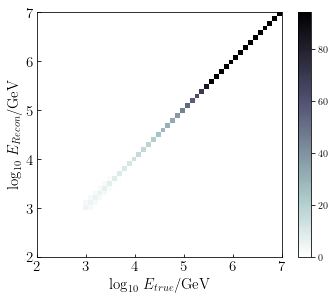

In [ ]:
e_bin = np.log10(e_grid_c) #np.log10(energies)
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6./8. ), sharex=True)
z_p=ax1.imshow((np.array(grid_recon)), origin='lower', extent=( min(e_bin), max(e_bin), min(e_bin), max(e_bin)),
               cmap=plt.get_cmap('bone_r'))

#ax1.contour(np.array(grid_recon).T, levels = [0.68], colors='red', linestyles='-',
#            origin='lower', extent=( min((e_bin)), max((e_bin)), min((e_bin)), max((e_bin))) )
figure.colorbar(z_p, ax=(ax1))
#ax1.contour((samples_fun*e_grid).T, levels = [1.2], colors='purple', linestyles='-',
#            origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid))) )


ax1.set_xlabel(r"$\log_{10}$ $E_{true} / \textrm{GeV}$", fontsize=fontsize)
ax1.set_ylabel(r"$\log_{10}$ $E_{Recon} / \textrm{GeV}$", fontsize=fontsize)
#ax1.set_ylabel(r"Distribution fraction", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(2,7)
ax1.set_ylim(2,7)
# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
figure.savefig(PICS + "Reconstruction_"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')


In [ ]:
smearing_file.columns

Index(['x', 'y', 'z', 'stheta', 'sphi', 't', 'logE', 'ang_res_sampl',
       'theta_deg', 'phi_deg', 'ang_res_circ'],
      dtype='object')

In [ ]:
a_eff_file[0].shape, a_eff_file[1].shape

((40,), (41,))

In [ ]:
a_eff_file[2]['aeff_hist'][1, 1, math.nan, 50]

array([[0.01290754, 0.01597975, 0.01989947, ..., 0.05048536, 0.0384669 ,
        0.0270018 ],
       [0.0125111 , 0.01525099, 0.0190753 , ..., 0.09159018, 0.07288259,
        0.05679864],
       [0.01235376, 0.01528677, 0.01858702, ..., 0.17338268, 0.15187691,
        0.126848  ],
       ...,
       [0.01188619, 0.01503332, 0.01873351, ..., 1.63254325, 1.79048184,
        1.88596878],
       [0.01271798, 0.01535617, 0.01947273, ..., 1.68530497, 1.8278803 ,
        1.94969206],
       [0.01301501, 0.01610624, 0.01996604, ..., 1.72494574, 1.8355418 ,
        1.99242849]])

In [ ]:
test_keys_aeff_11 = [[1, 1, 'nan',  50.0], [1, 1, 'nan',  80.0], [1, 1, 'nan',  110.0], [1, 1, 'nan',  140.0], [1, 1, 'nan',  200.0]]
test_keys_aeff_12 = [[1, 2, 'nan', 50.0], [1, 2, 'nan', 80.0], [1, 2, 'nan', 110.0],  [1, 2, 'nan', 140.0], [1, 2, 'nan', 200.0] ]
test_keys_aeff_21 = [[2, 1, 'nan', 50.0], [2, 1, 'nan', 80.0], [2, 1, 'nan', 110.0], [2, 1, 'nan', 140.0],  [2, 1, 'nan', 200.0]]
test_keys_aeff_22 = [[2, 2, 'nan', 50.0],  [2, 2, 'nan', 80.0], [2, 2, 'nan', 110.0], [2, 2, 'nan', 140.0],  [2, 2, 'nan', 200.0]]
spacing = [50, 80, 110, 140, 200]
hit = [1, 2]
module = [1, 2]

In [ ]:
spacing

[50, 80, 110, 140, 200]

In [ ]:
for i,k in enumerate(spacing):
    print(np.array(a_eff_file[2]['aeff_hist'][1, 1, math.nan, spacing[i]]).shape)
    print(np.array(a_eff_file[2]['aeff_hist'][1, 2, math.nan, spacing[i]]).shape)
    print(np.array(a_eff_file[2]['aeff_hist'][2, 1, math.nan, spacing[i]]).shape)
    print(np.array(a_eff_file[2]['aeff_hist'][2, 2, math.nan, spacing[i]]).shape)
    

(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
(39, 40)
